# Binomial Tree model

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

#strike
K = 99

#Volatility
vol = 0.20

#Stock Price t=0
s_0 = 100

#Interest rate
r = 0.06

#Time to maturity is one year
T = 1

In [3]:
#Final price of stock
def fin_stock_price(s_0, vol, power, dt):
    return s_0*(np.exp(vol*np.sqrt(dt))**(power))

#Price of option at expiration
def call_expiration_option_price(K, s_T):
    return max(0, s_T - K)

def put_expiration_option_price(K, s_T):
    return max(0, K - s_T)

def fair_value(r, dt, p, prev_fair_val_1, prev_fair_val_2):
    return np.exp(-r*dt)*(p*(prev_fair_val_1) + (1 - p)*prev_fair_val_2)

# European call option

In [4]:
row_list = []

def calculate_prev_row(dt, p):
    row_values = []
    prev_row_values = row_list[len(row_list) - 1]
    for i in range(len(prev_row_values) -1):
        #print(i)
        fv = fair_value(r, dt, p, prev_row_values[i], prev_row_values[i+1])
        row_values.append(fv)
    row_list.append(row_values)

#returns the option price
def option_pricer_value(steps, vol):
    dt = T/steps
    up_val = np.exp(vol*np.sqrt(dt))
    down_val = np.exp(-vol*np.sqrt(dt))
    p = (np.exp(r*dt) - down_val)/(up_val - down_val)
    row_list.clear()
    leaf_nodes = []
    for i in range(steps, -steps-1, -2):
        s_T = fin_stock_price(s_0, vol, i, dt)
        end_option_price = call_expiration_option_price(K, s_T)
        leaf_nodes.append(end_option_price)
    row_list.append(leaf_nodes)
    #print(leaf_nodes)

    for i in range(steps):
        calculate_prev_row(dt,p)

    return row_list[-1][0]


#Returns whole tree of options prices
def option_pricer_list(steps, vol):
    dt = T/steps
    up_val = np.exp(vol*np.sqrt(dt))
    down_val = np.exp(-vol*np.sqrt(dt))
    p = (np.exp(r*dt) - down_val)/(up_val - down_val)
    row_list.clear()
    leaf_nodes = []
    for i in range(steps, -steps-1, -2):
        s_T = fin_stock_price(s_0, vol, i, dt)
        end_option_price = call_expiration_option_price(K, s_T)
        leaf_nodes.append(end_option_price)
    row_list.append(leaf_nodes)

    for i in range(steps):
        calculate_prev_row(dt,p)

    return row_list
    
option_pricer_value(50, vol)

11.546434850755151

# Effect of volatility

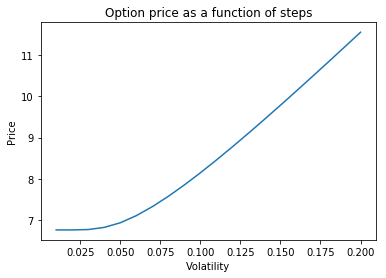

In [8]:
xlist = [i for i in np.linspace(0.01, 0.20, 20)]
ylist = [option_pricer_value(100, i) for i in np.linspace(0.01, 0.20, 20)]

plt.figure()
plt.title('Option price as a function of steps')
plt.xlabel('Volatility')
plt.ylabel('Price')
plt.plot(xlist, ylist)
plt.show()

# Convergence

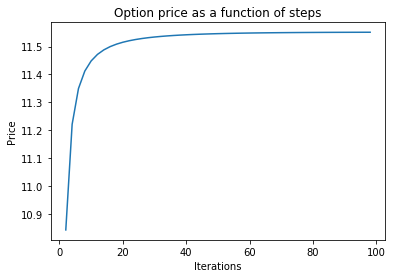

In [9]:
import matplotlib.pyplot as plt

xlist = [i*2 for i in range(1, 50)]
ylist = [option_pricer_value(i*2, vol) for i in range(1, 50)]

plt.figure()
plt.title('Option price as a function of steps')
plt.xlabel('Iterations')
plt.ylabel('Price')
plt.plot(xlist, ylist)
plt.show()

# Computational Complexity/Compute time

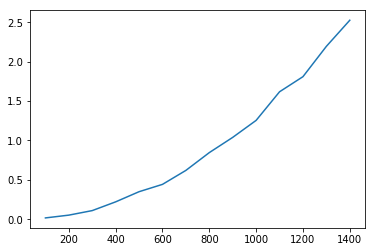

In [10]:
from timeit import default_timer as timer
import numpy as np

mean_times = []
for i in range(1, 15):
    time_list = []
    for j in range(10):
        start = timer()
        option_pricer_value(i*100, vol)
        end = timer()
        time_list.append(end - start)
    mean_times.append(np.mean(time_list))
    
iter_list = [i*100 for i in range(1, 15)]

plt.plot(iter_list, mean_times)
plt.show()
    

# Compute delta

In [25]:
def calculate_delta_value(some_list_of_lists, s_0):
    dt = T/(len(some_list_of_lists)-1)
    delta_list = []
    #print(len(some_list_of_lists))
    #Powers of up movement, increasing by one with each list in some_list_of_lists 
    for j in range(len(some_list_of_lists)-1):
        #print(j)
        deltas = []
        #within each list
        for i in range(len(some_list_of_lists[j]) - 1):
            f_u = some_list_of_lists[j][i]
            #print(f_u)
            f_d = some_list_of_lists[j][i+1]
            s_u = s_0*(np.exp(vol*np.sqrt(dt))**(len(some_list_of_lists[j]) -2*i))
            #print(s_u)
            s_d = s_0*(np.exp(vol*np.sqrt(dt))**(len(some_list_of_lists[j]) -2*(i+1)))
            #print(s_d)
            if (s_u - s_d) == 0:
                delta = 0
                print('s_u')
            else:
                delta = (f_u - f_d)/(s_u - s_d)
            
            deltas.append(delta)
        delta_list.append(deltas)
    return delta_list[-1][0]
        
def calculate_delta_list(some_list_of_lists, s_0):
    dt = T/(len(some_list_of_lists)-1)
    delta_list = []
    #print(len(some_list_of_lists))
    #Powers of up movement, increasing by one with each list in some_list_of_lists 
    for j in range(len(some_list_of_lists)-1):
        #print(j)
        deltas = []
        #within each list
        for i in range(len(some_list_of_lists[j]) - 1):
            f_u = some_list_of_lists[j][i]
            #print(f_u)
            f_d = some_list_of_lists[j][i+1]
            s_u = s_0*(np.exp(vol*np.sqrt(dt))**(len(some_list_of_lists[j]) -2*i))
            #print(s_u)
            s_d = s_0*(np.exp(vol*np.sqrt(dt))**(len(some_list_of_lists[j]) -2*(i+1)))
            #print(s_d)
            if (s_u - s_d) == 0:
                delta = 0
                print('s_u')
            else:
                delta = (f_u - f_d)/(s_u - s_d)
            
            deltas.append(delta)
        delta_list.append(deltas)
    return delta_list



In [31]:
row_list = []
calculate_delta_value(option_pricer_list(10, vol), 100)

0.6279356493082057

In [29]:
x = calculate_delta_value(row_list, 100)
print(x)

0.6279356493082057


# Delta at different volatilities

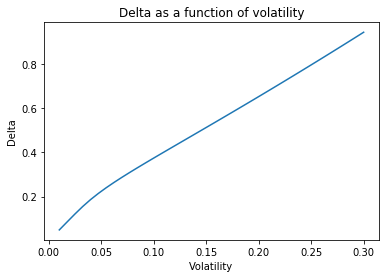

In [45]:
xlist = [i for i in np.linspace(0.01, 0.30, 40)]
ylist = [calculate_delta_value(option_pricer_list(50, i), 100) for i in np.linspace(0.01, 0.30, 40)]

plt.figure()
plt.title('Delta as a function of volatility')
plt.xlabel('Volatility')
plt.ylabel('Delta')
plt.plot(xlist, ylist)
plt.show()

# American Options

In [37]:
american_row_list = []

def american_calculate_prev_row(dt, p, Call=True):
    row_values = []
    prev_row_values = american_row_list[len(american_row_list) - 1]
    stock_prices = []
    for j in range(1, len(prev_row_values)):
        power = ((len(prev_row_values)) - 2*j)
        #print(power)
        stock_price = s_0*(np.exp(vol*np.sqrt(dt))**power)
        stock_prices.append(stock_price)

    for i in range(len(prev_row_values) -1):
        
        fv = fair_value(r, dt, p, prev_row_values[i], prev_row_values[i+1])
        
        
        #print(stock_price)
        
        if Call == True:
            if stock_prices[i] - K > fv:
                #print('Exercised early')
                fv = stock_price - K
            
        if Call == False:
            if K - stock_price[i] > fv:
                fv = K - stock_prices[i]
        row_values.append(fv)
    american_row_list.append(row_values)
    

def american_option_pricer_list(steps, vol):
    dt = T/steps
    up_val = np.exp(vol*np.sqrt(dt))
    down_val = np.exp(-vol*np.sqrt(dt))
    p = (np.exp(r*dt) - down_val)/(up_val - down_val)
    american_row_list.clear()
    leaf_nodes = []
    for i in range(steps, -steps-1, -2):
        s_T = fin_stock_price(s_0, vol, i, dt)
        end_option_price = call_expiration_option_price(K, s_T)
        leaf_nodes.append(end_option_price)
    american_row_list.append(leaf_nodes)
    
    #print(leaf_nodes)

    for i in range(steps):
        american_calculate_prev_row(dt, p)
        #print(american_row_list)

    return american_row_list


def american_option_pricer_value(steps, vol):
    dt = T/steps
    up_val = np.exp(vol*np.sqrt(dt))
    down_val = np.exp(-vol*np.sqrt(dt))
    p = (np.exp(r*dt) - down_val)/(up_val - down_val)
    american_row_list.clear()
    leaf_nodes = []
    for i in range(steps, -steps-1, -2):
        s_T = fin_stock_price(s_0, vol, i, dt)
        end_option_price = call_expiration_option_price(K, s_T)
        leaf_nodes.append(end_option_price)
    american_row_list.append(leaf_nodes)
    
    #print(leaf_nodes)

    for i in range(steps):
        american_calculate_prev_row(dt, p)
        #print(american_row_list)

    return american_row_list[-1][0]

american_option_pricer_value(1000, vol)
        

11.544690260823083

# Convergence of American Call option

In [43]:
import matplotlib.pyplot as plt

xlist = [i*25 for i in range(4, 50)]
ylist = [american_option_pricer_value(i*25, vol) for i in range(4, 50)]

plt.figure()
plt.title('American Call Option price as a function of steps')
plt.xlabel('Iterations')
plt.ylabel('Price')
plt.plot(xlist, ylist)
plt.show()

KeyboardInterrupt: 

# Convergence of american put option

In [44]:
#American option pricer modified for puts
def american_put_option_pricer_value(steps, vol):
    dt = T/steps
    up_val = np.exp(vol*np.sqrt(dt))
    down_val = np.exp(-vol*np.sqrt(dt))
    p = (np.exp(r*dt) - down_val)/(up_val - down_val)
    american_row_list.clear()
    leaf_nodes = []
    for i in range(steps, -steps-1, -2):
        s_T = fin_stock_price(s_0, vol, i, dt)
        end_option_price = put_expiration_option_price(K, s_T)
        leaf_nodes.append(end_option_price)
    american_row_list.append(leaf_nodes)
    
    #print(leaf_nodes)

    for i in range(steps):
        american_calculate_prev_row(dt, p)
        #print(american_row_list)

    return american_row_list[-1][0]

american_put_option_pricer_value(100, vol)


1.0

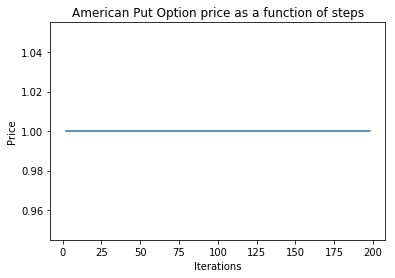

In [42]:
import matplotlib.pyplot as plt

xlist = [i*2 for i in range(1, 100)]
ylist = [american_put_option_pricer_value(i*2, vol) for i in range(1, 100)]

plt.figure()
plt.title('American Put Option price as a function of steps')
plt.xlabel('Iterations')
plt.ylabel('Price')
plt.plot(xlist, ylist)
plt.show()

##### American call options and volatility

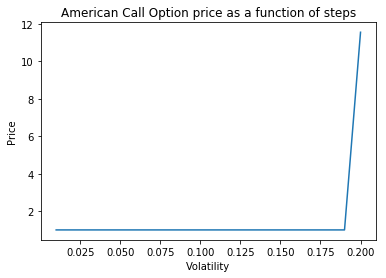

In [8]:
xlist = [i for i in np.linspace(0.01, 0.20, 20)]
ylist = [american_option_pricer_value(100, i) for i in np.linspace(0.01, 0.20, 20)]

plt.figure()
plt.title('American Call Option price as a function of steps')
plt.xlabel('Volatility')
plt.ylabel('Price')
plt.plot(xlist, ylist)
plt.show()

# American put options and volatility 

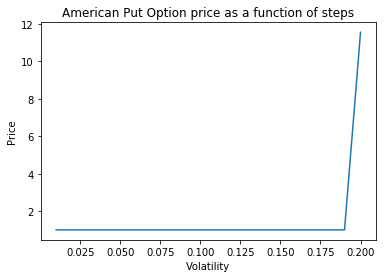

In [40]:
xlist = [i for i in np.linspace(0.01, 0.20, 20)]
ylist = [american_option_pricer_value(100, i) for i in np.linspace(0.01, 0.20, 20)]

plt.figure()
plt.title('American Put Option price as a function of steps')
plt.xlabel('Volatility')
plt.ylabel('Price')
plt.plot(xlist, ylist)
plt.show()